In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/var/folders/t_/zg07cvps22539wsx9x9l8nhr0000gn/T/ipykernel_26190/3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Linear regression and knn comparison were used to analyze the relationship between the factors influencing the change in the proportion of people directly employed in the tourism industry

#### BY : Kai Jin  

#### Student ID : 22011493

## Table of Contents
1. **Introduction**
   1. Datasets used
   2. Dataset sources
   3. Key research questions
2. **Executive Summary**
   1. Data Acquisition
   2. Data Wrangling
   3. Data Integration
   4. Data Analysis
   5. Predictive Modelling    
3. **Conclusion**
   1. Key findings
4. **Bibliography**

# Introduction
Since the beginning of the 21st century, with the development of New Zealand's economy, the continuous promotion of construction between cities and towns, and the increasing improvement of traffic conditions, New Zealand's tourism industry has been promoted. Among them, the direct employment population in the tourism industry can directly illustrate the current tourism situation of New Zealand, and many other factors can affect the change of this factor. The closest data relationship is determined through data collation and exploratory data analysis (EDA). The knn model and various linear regression models are established for prediction analysis, and the prediction results and accuracy are compared. 

#### Datasets used
    1.Percentage of people employed directly in tourism in New Zealand 2000 to 2022 (per year)
    2.Percentage of people employed indirectly in tourism in New Zealand 2000 to 2022 (per year)
    3.Median hourly wages and self-employment earnings in New Zealand 2000 to 2022 (per year)
    4.International tourism expenditure as a proportion of New Zealand's exports 2000 to 2022 (per year)
    5.Value added as a percentage of New Zealand's tourism contribution to GDP from 2000 to 2022 (per year)

#### Dataset sources
    1.https://figure.nz/ 
    (The primary source of data on this website is Statistics New Zealand)

### Key research questions

1. Build multiple regression and kNN models and compare their outputs.
  
2. Experiment with models using different features. Which features are most effective? Why?
  
3. Experiment with kNN using different distance metrics and different values of k, and compare the outputs. Which values of k are most robust for the size of your dataset and your problem domain? Are variables in your data having different scales affecting the algorithm’s accuracy? How have you tried to overcome this?

4. Experiment with linear, multiple linear and polynomial regression models and compare them. At what point does a regression model become too complex and no longer captures the true relationships in the data?
   
5. How reliable are your prediction models? What do the confidence intervals and prediction bands tell you? Could you recommend this predictive model to a client? Would you expect this model to preserve its accuracy on data beyond the range it was built on?

### Executive Summary

##### Import tool configuration
      Import the required extension libraries, plotting tools, and datasets into the jupyter notebook, and perform exploratory data analysis (EDA) on the key questions raised by going through data cleaning, filtering, and plotting the data in the dataset.(The python version used is 3.11.2)


In [2]:
import requests                 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import statsmodels.api as sm
import urllib
import urllib.request
import matplotlib as mpl
import seaborn as sns
import patsy
import plotly
import sys
import plotly.graph_objects as go
import plotly_express as px
import statsmodels.formula.api as smf
import os

from unicodedata import normalize
from bs4 import BeautifulSoup
from time import sleep
from datetime import datetime   
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



Set and limit the output data to prevent too much output data.

#### Data Acquisition
     Obtain the required data of "population directly employed by tourism industry", and also obtain the data that may be related to it.After obtaining the data, the corresponding statistical chart can be established, so that the curve changes of the data can be seen more directly, and the relationship between them can be analyzed more easily


##### Percentage of people employed directly and indirectly in tourism in New Zealand 2000 to 2022 (per year)
   

  Through the request and parsing of the web page, the table data in the web page is extracted and two sub-data sets are extracted by conditional filtering.The data format in the sub-data set is processed, and the line chart is established 

In [3]:
url = "https://figure.nz/chart/5WdDAEkslknh2kR2-fwsznkCjQ9yoCYzN"
response = requests.get(url) 
page = response.content
page
scraping = BeautifulSoup(page, "lxml") 
tourism_table = scraping.find_all('table')

tourism_df = pd.read_html(str(tourism_table))

tourism_df = tourism_df[0]

tourism_df1 = tourism_df.loc[(tourism_df['Measure'] == 'Directly employed in tourism')]
tourism_df2 = tourism_df.loc[(tourism_df['Measure'] == 'Indirectly employed in tourism')]


In [4]:
x1 = np.array(tourism_df1['Year ended March'].astype(str))
x2 = np.array(tourism_df2['Year ended March'].astype(str))
y1 = np.array(tourism_df1['% of people employed'].str.replace('%', '').astype(float))
y2 = np.array(tourism_df2['% of people employed'].str.replace('%', '').astype(float))

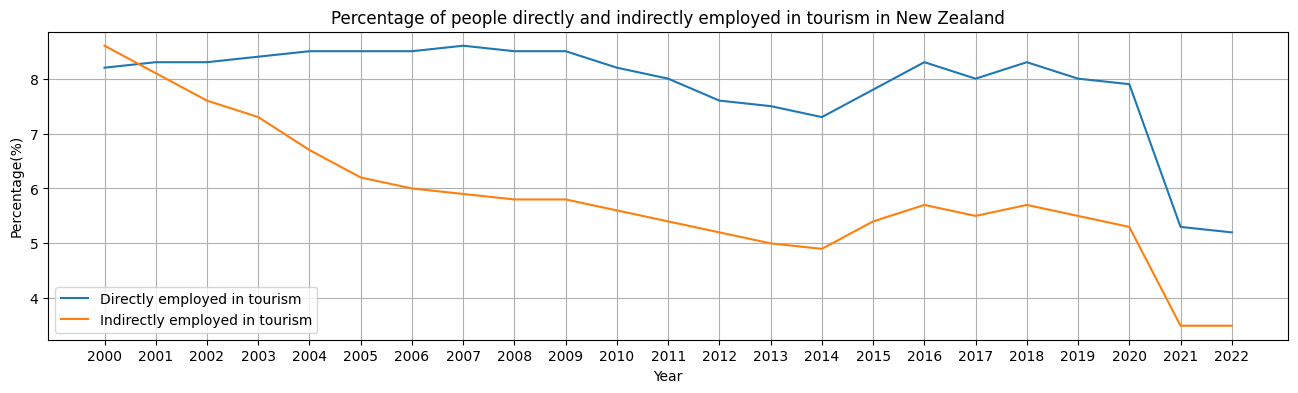

In [5]:
fig, ax = plt.subplots(figsize=(16, 4))  
ax.plot(x1, y1, label='Directly employed in tourism')  
ax.plot(x2, y2, label='Indirectly employed in tourism')  

ax.set_title('Percentage of people directly and indirectly employed in tourism in New Zealand')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage(%)')
ax.grid(True)

ax.legend()
plt.show()

##### Median hourly wages and self-employment earnings in New Zealand 2000 to 2022 (per year)


Using different data acquisition methods, by retrieving the whole web page, reading the 'table' tag in the web page, determining the number of tables in the web page, selecting the required table, and processing. The processing is similar to the approach above.(Data processing: Remove the data that does not conform to the time interval)

In [6]:
table_MN = pd.read_html('https://figure.nz/chart/nrYUawzOEbEdxJvE-4fx0E1abKcdNxnPV')
print(f'Total tables: {len(table_MN)}')
income_df = table_MN[0]
SEI_df = income_df.loc[(income_df['Income source'] == 'Self-employment income')]
SEI_df = SEI_df.drop([0, 1])
WAS_df = income_df.loc[(income_df['Income source'] == 'Wage and salary income')]
WAS_df = WAS_df.iloc[2:]

Total tables: 1


In [7]:
x1 = np.array(SEI_df['Year as at June'].astype(str))
x1 = np.array(WAS_df['Year as at June'].astype(str))
y1 = np.array(SEI_df['NZD'].astype(float))
y2 = np.array(WAS_df['NZD'].astype(float))

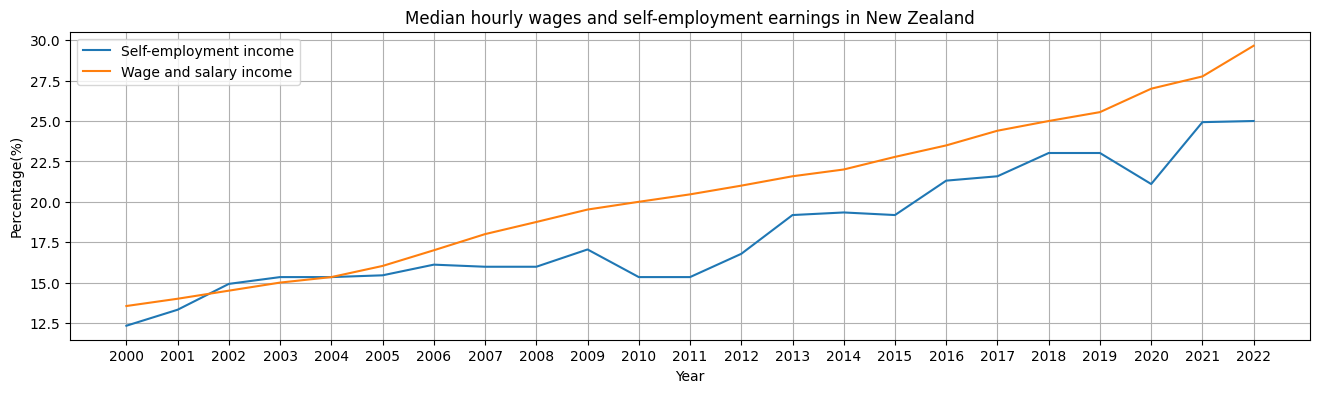

In [8]:
fig, ax = plt.subplots(figsize=(16, 4))  
ax.plot(x1, y1, label='Self-employment income')  
ax.plot(x2, y2, label='Wage and salary income')  

ax.set_title('Median hourly wages and self-employment earnings in New Zealand')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage(%)')
ax.grid(True)

ax.legend()

plt.show()

##### International tourism expenditure as a proportion of New Zealand's exports 2000 to 2022 (per year)

In [9]:
table_MN = pd.read_html('https://figure.nz/chart/2KPwumiv9pL26uB9')
print(f'Total tables: {len(table_MN)}')
IT_df = table_MN[0]

Total tables: 1


In [10]:
x = np.array(IT_df['Year ended March'].astype(str))
y = np.array(IT_df['% of total exports'].str.replace('%', '').astype(float))    

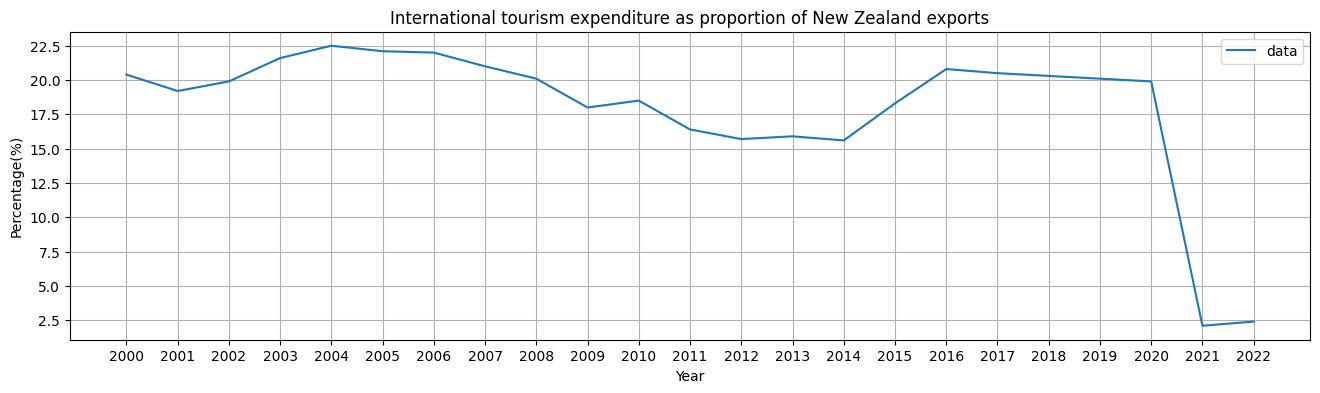

In [11]:
fig, ax = plt.subplots(figsize=(16, 4))  
ax.plot(x, y,label='data' )  

ax.set_title('International tourism expenditure as proportion of New Zealand exports')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage(%)')
ax.grid(True)

ax.legend()
plt.show()

##### Value added as a percentage of New Zealand's tourism contribution to GDP from 2000 to 2022 (per year)

In [12]:
table_MN = pd.read_html('https://figure.nz/chart/MHofItXMEuhyY6SA')
print(f'Total tables: {len(table_MN)}')
TTV_df = table_MN[0]

Total tables: 1


In [13]:
x = np.array(TTV_df['Year ended March'].astype(str))
y = np.array(TTV_df['% of GDP'].str.replace('%', '').astype(float))

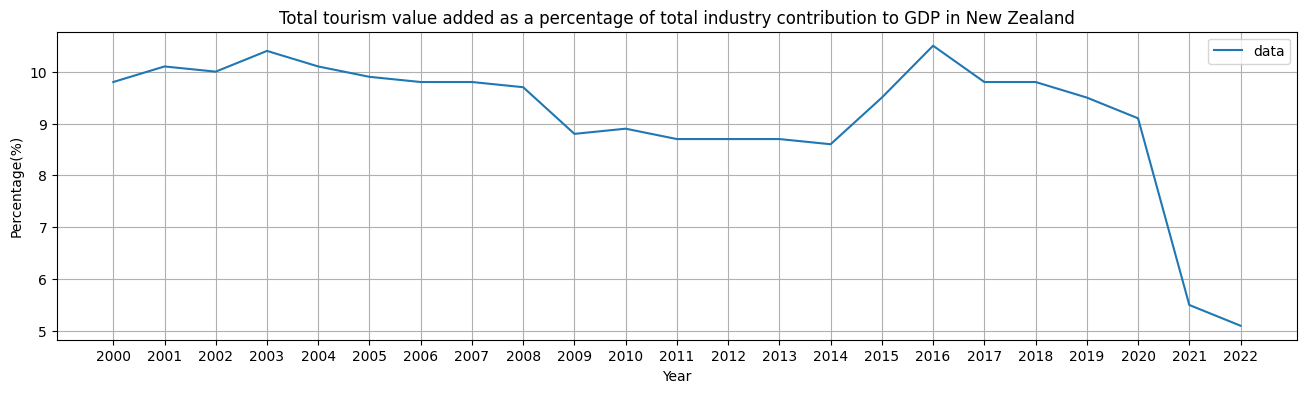

In [14]:
fig, ax = plt.subplots(figsize=(16, 4))  
ax.plot(x, y, label='data' )  



ax.set_title('Total tourism value added as a percentage of total industry contribution to GDP in New Zealand')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage(%)')
ax.grid(True)

ax.legend()
plt.show()

#### Data Wrangling
     The data format obtained in the previous step is processed to make the data easier to use in the next step and reduce errors caused by different data formats when using the data.

In [15]:
DET = np.array(tourism_df1['% of people employed'].str.replace('%', '').astype(float))
IET = np.array(tourism_df2['% of people employed'].str.replace('%', '').astype(float))
SEI = np.array(SEI_df['NZD'].astype(float))
WSI = np.array(WAS_df['NZD'].astype(float))
IT  = np.array(IT_df['% of total exports'].str.replace('%', '').astype(float))
TTV = np.array(TTV_df['% of GDP'].str.replace('%', '').astype(float))

 #### Data Integration
      The data collected in the previous step will be reintegrated into a new table, and the data in the table will be cleaned to make it more convenient to prepare for data analysis.

In [16]:
df = pd.DataFrame(columns=['DET', 'IET', 'SEI', 'WSI', 'IT', 'TTV'])
df['DET'] = DET
df['IET'] = IET
df['SEI'] = SEI
df['WSI'] = WSI
df['IT'] = IT
df['TTV'] = TTV

In [17]:
df = df.dropna()

#### Data Analysis
     Conduct data analysis on the data merged and sorted in the previous step, so as to obtain the analysis results and prepare for the next step of modeling

Perform data analysis on the generated list, generate PivotTable, and analyze the data in the table.

In [18]:
pivot_table = df.pivot_table(index='DET', values=['IET', 'SEI', 'WSI', 'IT', 'TTV'])
pivot_table

,IET,IT,SEI,TTV,WSI
DET,,,,,
5.2,3.500000,2.40,25.0000,5.100000,29.6600
5.3,3.500000,2.10,24.9300,5.500000,27.7600
7.3,4.900000,15.60,19.3400,8.600000,22.0000
7.5,5.000000,15.90,19.1800,8.700000,21.5800
7.6,5.200000,15.70,16.7800,8.700000,21.0000
7.8,5.400000,18.30,19.1800,9.500000,22.7800
7.9,5.300000,19.90,21.1000,9.100000,27.0000
8.0,5.466667,19.00,19.9800,9.333333,23.4700
8.2,7.100000,19.45,13.8350,9.350000,16.7750


Moreover, scatter matrix images are produced. The linear relationship between each list can be illustrated more vividly through data distribution in the scatter diagram, and the data most closely associated with DET(tourism directly employed population) can be selected. 

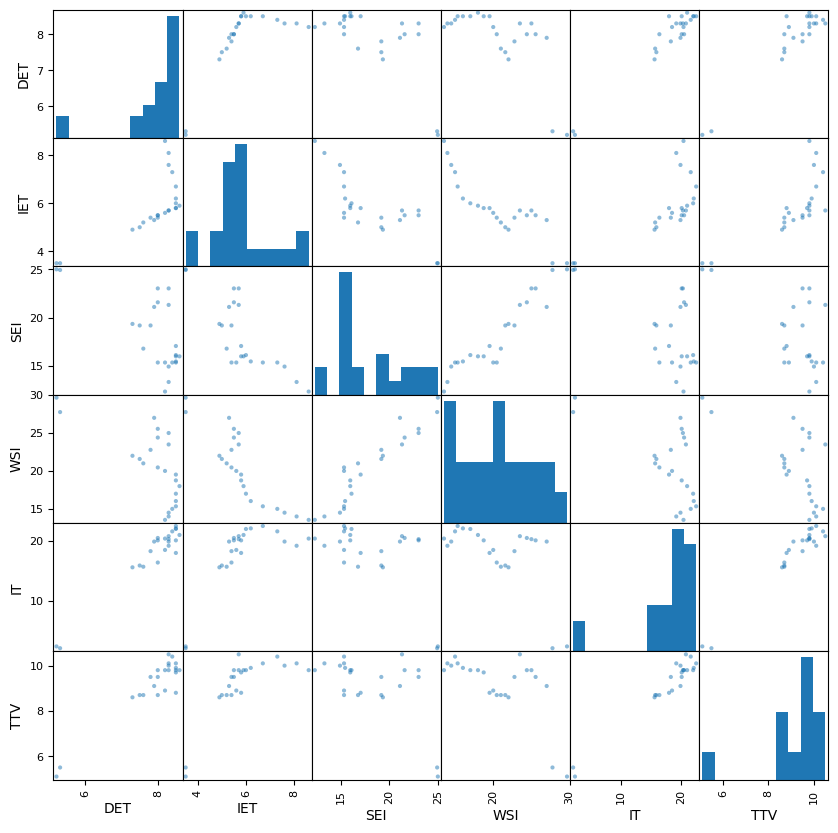

In [19]:
scatter_matrix = pd.plotting.scatter_matrix(df[['DET', 'IET', 'SEI', 'WSI', 'IT', 'TTV']], diagonal='hist', figsize=(10, 10))
plt.show()

Finally, corr() is used to form a matrix of relational coefficients, which directly reflects the strength and direction of the relationship between various lists. Output values close to 1 or -1 (positive or negative correlation) are selected as far as possible, so as to help further data analysis and modeling.

In [20]:
df.corr()

,DET,IET,SEI,WSI,IT,TTV
DET,1.000000,0.707797,-0.660448,-0.670594,0.969316,0.943360
IET,0.707797,1.000000,-0.785104,-0.862217,0.696871,0.751184
SEI,-0.660448,-0.785104,1.000000,0.941750,-0.571081,-0.571527
WSI,-0.670594,-0.862217,0.941750,1.000000,-0.607218,-0.638068
IT,0.969316,0.696871,-0.571081,-0.607218,1.000000,0.973038
TTV,0.943360,0.751184,-0.571527,-0.638068,0.973038,1.000000


Thus, the data most closely related to DET (direct employment in tourism) are IT(International tourism expenditure),TTV(Total tourism value added as a percentage of total industry contribution to GDP) and IET(Indirectly employed in tourism) with 0.969316, 0.943360 and 0.707797 respectively, indicating a very high correlation with IT and TTV.

#### Predictive Modelling 
     On the list data that has been sorted out and analyzed above, the model is established, and the prediction is made, and the data model is analyzed

##### Univariate linear regression

According to the results of the above data analysis, the most closely related factors are selected, so as to establish a univariate linear regression model between DET and IT

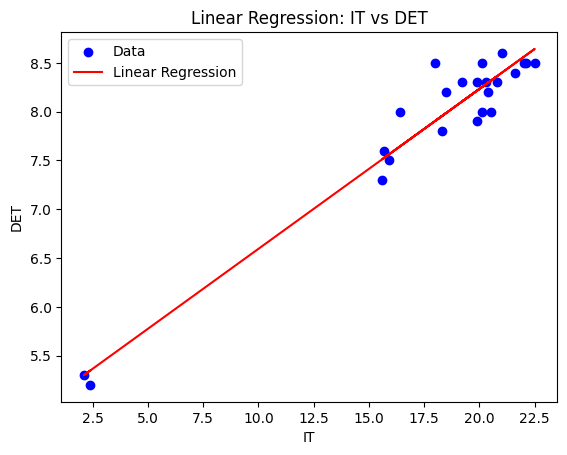

In [21]:
X = df['IT'].values.reshape(-1, 1) 
y = df['DET'].values

regressor = LinearRegression()
regressor.fit(X, y)

y_pred = regressor.predict(X)

plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, color='red', label='Linear Regression')
plt.xlabel('IT')
plt.ylabel('DET')
plt.title('Linear Regression: IT vs DET')
plt.legend()
plt.show()



Through analyzing the OLS regression results:

1. R-squared = 0.940, indicating that the model explains 94% of the variance in the dependent variable (DET), suggesting a good fit of the model.
   
2. Adj. R-squared = 0.937, considering the number of independent variables, the adjusted R-squared is also relatively high, indicating a good fit of the model while taking into account the number of independent variables.
   
3. F-statistic = 326.5, corresponding Prob (F-statistic) = 2.82e-14, indicating that the F-statistic of the model is significant, suggesting that the independent variable (IT) plays a significant role in explaining the variability of the dependent variable (DET).
   
4. The coefficient of the IT variable is 0.1638, with a standard error of 0.009, and a t-statistic of 18.070, with P>|t| = 0.000, indicating that the coefficient of the IT variable is significant at a significance level, indicating a significant impact of the IT variable on the dependent variable DET.
   
5. Intercept = 4.9559, with a standard error of 0.170, and a t-statistic of 29.201, with P>|t| = 0.000, indicating that the intercept is significant at a significance level, suggesting a significant impact of the intercept on the dependent variable DET.
   
In conclusion, the OLS regression model has a good fit, and the IT variable and intercept have significant effects on the dependent variable DET. 

In [22]:
mod = smf.ols("DET ~ IT", df).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DET   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     326.5
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           2.82e-14
Time:                        19:57:55   Log-Likelihood:                 2.4179
No. Observations:                  23   AIC:                           -0.8358
Df Residuals:                      21   BIC:                             1.435
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9559      0.170     29.201      0.000       4.603       5.309
IT             0.1638      0.009     18.070      0.000       0.145       0.183
==============================================================================
Omnibus:                        4.539   Durbin-Watson:                   0.918
Prob(Omnibus):                  0.103   Jarque-Bera (JB):                2.859
Skew:                           0.835   Prob(JB):                        0.239
Kurtosis:                       3.445   Cond. No.                         67.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The regression equation is given by:
DET = 4.9559 + 0.1638 * IT

In [23]:
x = np.array(df['IT'].astype(float))
y = np.array(df['DET'].astype(float))
slope, intercept = np.polyfit(x,y,1)
print('Slope:', slope)
print('Intercept:', intercept)

Slope: 0.16383803480468973
Intercept: 4.955901748487905


A 95% confidence interval was set for the regression line model.As the chart shows, this is a range of intervals that contains 95% confidence in the true regression line parameters.

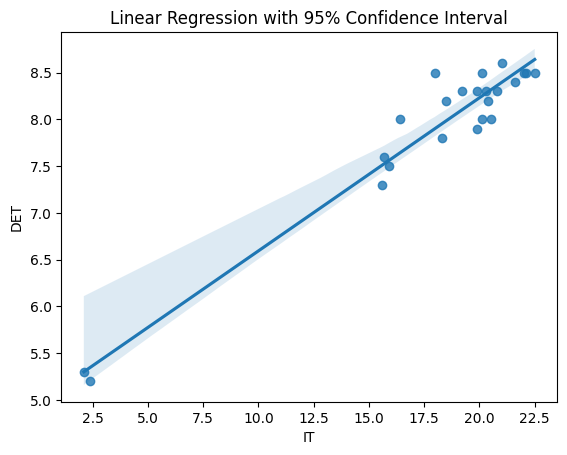

In [24]:
sns.regplot(x='IT', y='DET', data=df, ci=95)
plt.xlabel('IT')
plt.ylabel('DET')
plt.title('Linear Regression with 95% Confidence Interval')
plt.show()

The prediction interval is the range over which future observations are likely to be predicted with a certain degree of confidence. In the case of a 99% prediction interval, this means that there is a 99% chance that the true value of the dependent variable will fall within the predicted range.

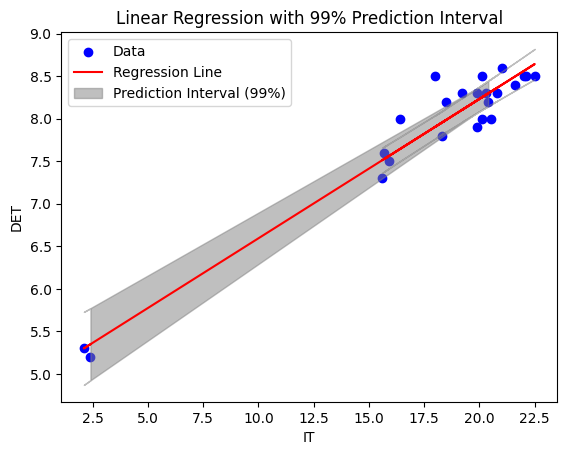

In [25]:
X = df['IT'].values
y = df['DET'].values

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

y_pred = model.predict(X)

prediction_interval = model.get_prediction(X).conf_int(alpha=0.01)

lower_bound = prediction_interval[:, 0]
upper_bound = prediction_interval[:, 1]

plt.scatter(X[:, 1], y, color='blue', label='Data')
plt.plot(X[:, 1], y_pred, color='red', label='Regression Line')
plt.fill_between(X[:, 1], lower_bound, upper_bound, color='gray', alpha=0.5, label='Prediction Interval (99%)')
plt.xlabel('IT')
plt.ylabel('DET')
plt.title('Linear Regression with 99% Prediction Interval')
plt.legend()
plt.show()

##### Polynomial linear regression

Build a polynomial regression model based on the linear regression model above. As can be seen from the figure, when the fitting times are 3, the value of R-squared (R2) is close to 1, which indicates that the model has a good goodness of fit. However, overfitting may occur in multiple fitting, so the fitting times should be controlled in a few as far as possible.

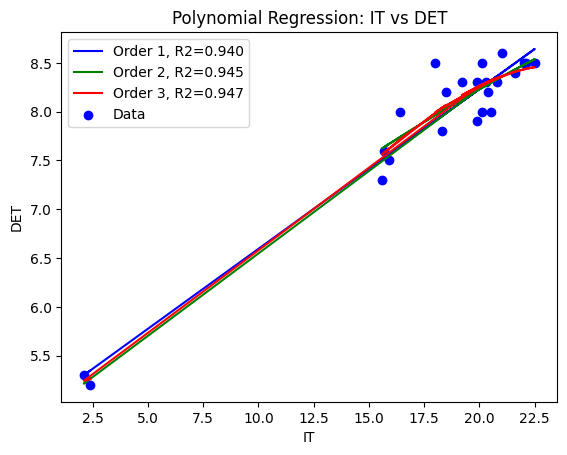

In [26]:
X = df['IT']
y = df['DET']

orders = [1, 2, 3]
colors = ['b', 'g', 'r']
r2_values = []

for i, order in enumerate(orders):

    X_poly = np.polyfit(X, y, order)
    poly_model = np.poly1d(X_poly)
    y_pred = poly_model(X)

    ssr = np.sum((y_pred - y)**2)
    sst = np.sum((y - y.mean())**2)
    r2 = 1 - (ssr / sst)
    r2_values.append(r2)

    
    plt.plot(X, y_pred, colors[i]+'-', label=f'Order {order}, R2={r2:.3f}')

plt.scatter(X, y, color='blue', label='Data')
plt.xlabel('IT')
plt.ylabel('DET')
plt.title('Polynomial Regression: IT vs DET')
plt.legend()
plt.show()

##### Multiple linear regression

According to the analysis of OLS regression results, the following conclusions can be drawn:
 
1. In this model, the estimated coefficient of the independent variable IT is 0.1365, and the p-value is 0.003, which is less than the commonly used significance level of 0.05, indicating that the relationship between IT and the dependent variable DET is statistically significant, that is, IT has a significant impact on DET. However, the p-values of SEI, WSI, TTV, and IET are all greater than 0.05, indicating that the influence of these independent variables on DET is not statistically significant. 
 
2. The R-squared value is 0.960, and the adjusted R-squared value is 0.948, indicating that this model can explain about 96% of the variance of the dependent variable DET and the model has high goodness of fit. 
 
3. The value of F-statistic is 81.75, and Prob (F-statistic) is 2.80e-11, indicating that the model is significant overall and there is a significant relationship between the independent variable and the dependent variable. 
 
4. The coefficient estimate for the independent variable IT is 0.1365, which means that for every unit increase in IT, the mean value of the dependent variable DET increases by 0.1365 units. However, the coefficient estimates of the other independent variables, SEI, WSI, TTV, and IET, are small and close to zero, indicating little influence on DET. 
 
5. The 95% confidence interval for the estimated coefficient of the independent variable IT is [0.054, 0.219], which means we can assume with 95% confidence that the actual coefficient value falls within this interval. 
 
In general, this regression model can explain the dependent variable DET, and IT is a significant independent variable. In contrast, the influence of other independent variables is small and insignificant. 

In [27]:
X = df[['IT', 'SEI', 'WSI', 'TTV','IET']] 
y = df['DET'] 
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    DET   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     81.75
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           2.80e-11
Time:                        19:57:55   Log-Likelihood:                 7.1825
No. Observations:                  23   AIC:                            -2.365
Df Residuals:                      17   BIC:                             4.448
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1349      0.986      6.222      0.0

According to the above analysis results and the data analysis results of the previous step, IT,TTV,IET in the df data frame were selected and analyzed in DET, the scatter matrix diagram was established, and the regression line was drawn. The difference between EDT by the three can be clearly seen.

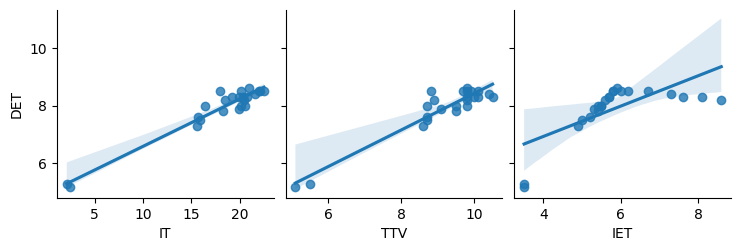

In [28]:
X = df[['IT', 'TTV', 'IET']]
y = df['DET']
sns.pairplot(df, x_vars=['IT', 'TTV', 'IET'], y_vars='DET', kind='reg')
plt.show()

3D scatter plots show the relationships between different independent variables and between independent variables and dependent variables in multiple linear regression models

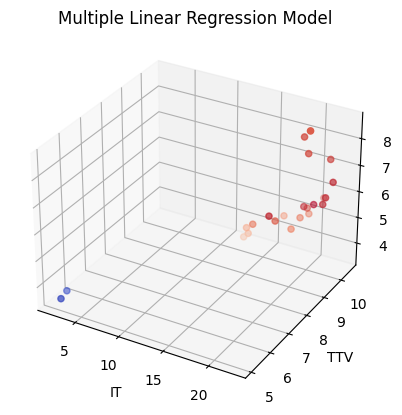

In [29]:
X = df[['IT', 'TTV', 'IET']]  
y = df['DET']  

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['IT'], X['TTV'], X['IET'], c=y, cmap='coolwarm')  
ax.set_xlabel('IT')
ax.set_ylabel('TTV')
ax.set_zlabel('IET')
ax.set_title('Multiple Linear Regression Model')

plt.show()

The regression plane of the multiple linear regression model is displayed on a 3D scatter plot, and the relationship between the independent variable and the dependent variable and the fitting effect of the model are visualized

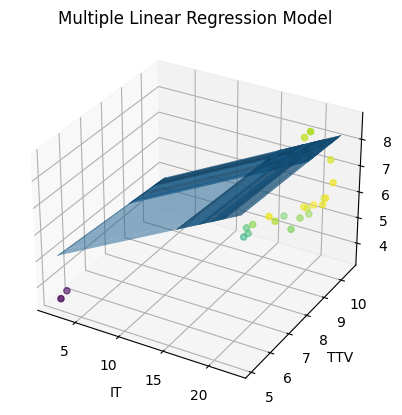

In [30]:
X = df[['IT', 'TTV', 'IET']]  
y = df['DET']  

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['IT'], X['TTV'], X['IET'], c=y, cmap='viridis')
ax.set_xlabel('IT')
ax.set_ylabel('TTV')
ax.set_zlabel('IET')
ax.set_title('Multiple Linear Regression Model')

model = sm.OLS(y, sm.add_constant(X)).fit()
xx, yy = np.meshgrid(X['IT'], X['TTV'])
zz = model.params[0] + model.params[1] * xx + model.params[2] * yy
ax.plot_surface(xx, yy, zz, alpha=0.5)

plt.show()

##### KNN Model

According to the data analysis, the knn model is established, and the data is standardized and then normalized, which can unify the scale between the data, improve the performance of the model and improve the training speed, so as to establish the knn model.

In [31]:
def z_score_normalize(data):
    mean = np.mean(data)
    std = np.std(data)
    normalized = (data - mean) / std
    return normalized

z_score_normalize_DET = z_score_normalize(DET)
z_score_normalize_IT = z_score_normalize(IT)

In [32]:
def min_max_normalize(data):
    min_val = np.min(data)
    max_val = np.max(data)
    normalized = (data - min_val) / (max_val - min_val)
    return normalized

normalized_DET = min_max_normalize(z_score_normalize_DET)
normalized_IT = min_max_normalize(z_score_normalize_IT)

When the data set is divided into a training set and test set in the knn model, 20% of the data is used as the test set, accounting for 20% of the total data set. It is a common practice to use a part of the data as a test set for evaluating the performance of the model, and when randomly splitting the data set, setting a random number seed can ensure that the same random splitting result is obtained each time the code is run, thus maintaining the reproducibility of the results. The value of n_neighbors (singular) is varied, and the MSE is measured to evaluate the model's performance with different parameter Settings. We can conclude that n_neighbors=3 has the best performance.

In [33]:
X = np.vstack((normalized_DET, normalized_IT)).T
y = normalized_IT
n_neighbors_list = [1, 3, 5, 7]

for n_neighbors in n_neighbors_list:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    print("n_neighbors = {}: MSE :{}".format(n_neighbors, mse))

n_neighbors = 1: MSE :0.0023933102652825807
n_neighbors = 3: MSE :0.0009344696484258194
n_neighbors = 5: MSE :0.0015788158400615118
n_neighbors = 7: MSE :0.0014576418802815265


Choosing different values of k for model prediction, IT can be observed that the predicted value of IT shows a smooth trend as the value of k increases. Small values of k, such as k=1, can lead to overfitting, as the model is too sensitive to noise or local features, resulting in large fluctuations in the predicted values. Large values of k, such as k=9, can lead to underfitting, as the model is too smooth to capture local features or subtle variations. Therefore, the best value of k from the data is k=5 because, at this value, the prediction of IT is relatively smooth, and there is no significant overfitting or underfitting.

In [34]:
k_values = [1, 3, 5, 7, 9]
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(normalized_DET.reshape(-1, 1), normalized_IT)
    IT_pred_normalized = knn.predict(normalized_DET.reshape(-1, 1))
    IT_pred = IT_pred_normalized * (np.max(IT) - np.min(IT)) + np.min(IT)
    print("k = {}, IT Predicted value :{}".format(k, IT_pred))

k = 1, IT Predicted value :[20.4 19.2 19.2 21.6 22.5 22.5 22.5 21.  22.5 22.5 20.4 16.4 15.7 15.9
 15.6 18.3 19.2 16.4 19.2 16.4 19.9  2.1  2.4]
k = 3, IT Predicted value :[19.36666667 19.96666667 19.96666667 22.06666667 22.2        22.2
 22.2        21.86666667 22.2        22.2        19.36666667 19.
 16.63333333 15.73333333 15.73333333 17.96666667 19.96666667 19.
 19.96666667 19.         18.93333333  6.7         6.7       ]
k = 5, IT Predicted value :[19.76 20.36 20.36 21.66 20.94 20.94 20.94 21.54 20.94 20.94 19.76 19.08
 17.08 17.08 17.08 18.16 20.36 19.08 20.36 19.08 19.04 10.34 10.34]
k = 7, IT Predicted value :[19.35714286 20.1        20.1        20.78571429 21.04285714 21.04285714
 21.04285714 21.04285714 21.04285714 21.04285714 19.35714286 19.15714286
 17.47142857 17.47142857 17.47142857 18.11428571 20.1        19.15714286
 20.1        19.15714286 19.15714286 12.84285714 12.84285714]
k = 9, IT Predicted value :[19.56666667 20.53333333 20.53333333 20.68888889 20.71111111 20.711

According to the KNN analysis results above, the KNN model is established. Manhattan distance is used for analysis with different k values and then compared with the KNN model of Euclidean distance above to judge the advantages and disadvantages.

In [35]:
X = np.vstack((normalized_DET, normalized_IT)).T

y = normalized_IT
n_neighbors_list = [1, 3, 5, 7, 9]

for n_neighbors in n_neighbors_list:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    knn = KNeighborsRegressor(n_neighbors=n_neighbors, p=1)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    print("MSE :", mse)

MSE : 0.0014513648596693554
MSE : 0.0015063650732624208
MSE : 0.0018725490196078397
MSE : 0.0030724054327613453
MSE : 0.003778105287140273


It can be seen from the data results that in this KNN model data, the MSE value output by the model data of Manhattan distance is not as good as the MSE value output by the KNN model of Euclidean distance, which can only show that the Euclidean distance is better than the Manhattan distance in the KNN model of this data analysis.

##### Comparing knn with multiple linear regression

Based on the provided results, the mean square error (MSE) of the multiple linear regression model is deficient, with a value of 4.190823558986625e-32, which indicates that the predictions on the test set are very accurate. On the other hand, the kNN regression model has a higher MSE of 0.0009344696484258194, indicating a slightly lower prediction accuracy than the multiple linear regression model. Given the small size of the dataset and the shallow MSE values (close to zero) of the multiple linear regression models, overfitting is possible.

In [36]:
X = np.vstack((normalized_DET, normalized_IT)).T
y = normalized_IT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

knn = KNeighborsRegressor(n_neighbors=3, p=2)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_knn = mean_squared_error(y_test, y_pred_knn)

print("MSE of Multiple Regression Models:", mse_lr)
print("MSE of KNN model:", mse_knn)

print("Results of Multiple Regression Models:", y_pred_lr)
print("Results of KNN model:", y_pred_knn)

MSE of Multiple Regression Models: 4.190823558986625e-32
MSE of KNN model: 0.0009344696484258194
Results of Multiple Regression Models: [0.79411765 0.77941176 0.89705882 0.88235294 0.90196078]
Results of KNN model: [0.81862745 0.83823529 0.89379085 0.89705882 0.88235294]


# Conclusion
 To sum up, the data on tourism development in New Zealand from 2000 to 2022 (annually) obtained by Statistics New Zealand can be analyzed by the KNN model and different types of linear regression models among various factors, and it can be concluded that the factor with the closest correlation between the number of people directly employed in tourism industry is the expenditure of international tourism on New Zealand Followed by the proportion of the value added of New Zealand's tourism industry to New Zealand's GDP. It can be shown that these two factors directly affect the number of people employed in tourism. In contrast, the indirect number of people employed and hourly wage changes have little impact on the number of people employed in tourism.

### Key findings

1. In this experiment, the multiple regression model is superior to the KNN model. After the establishment of multiple regression and the KNN model, the predicted value of the test data is obtained through the test data of both models, the MSE value of the two models is calculated, and then the output results are compared:
   
   MSE of Multiple Regression Models: 4.190823558986625e-32 < MSE of KNN model: 0.0009344696484258194
 
2. The data analysis section of this report explains that IT and DET were selected for modeling. In the experiments, the performance of the models was compared under different characteristics, and the best type of characteristics was chosen by comparing the performance of the models with different characteristics, by using a data perspective, by building a scatter matrix, and by using the corr() function to analyze the correlation between the different variables.
   
3. As detailed in the KNN Model in the Predictive Modelling environment of this experiment, the most suitable k value is 5, and the most suitable n_neighbors is 3. Whether it is a different k value or a different scale, it will specifically impact the algorithm's accuracy. To solve the problem, through the enumeration method, the K value and the scale are filtered one by one to obtain the most reasonable value
   
4. In the prediction model of this experiment, there are univariate linear regression, polynomial regression, and multiple linear regression to realize. After comparing the three regressions, the actual relationship in the data is no longer captured, which is the case of overfitting. The reasons for this may be that the amount of data is too small, there is too much noise, the dimensionality between features is high, and the complexity of the model is much higher than the problem's difficulty.
   
5. In the part of the prediction model of this experiment and in answering question 1 above, high reliability can be determined from the use value. The confidence interval is that the actual parameter values will be in this interval. At the same time, the prediction band is similar to the confidence interval. However, the prediction band considers the uncertainty of prediction error, including the parameter estimation error of the model and the randomness of the future observation value. Thus, the forecast band is usually more comprehensive than the confidence interval to account for the uncertainty of the forecast. I recommend this model to clients because of its high reliability. I expect the model to maintain its accuracy beyond its established range of data. However, there is a realistic probability that it will only maintain its accuracy within its established range.

# Bibliograph
1. McKinney, W. (2022). Python for data analysis : data wrangling with pandas, numPy, and Jupyter (Third edition). O’Reilly Media, Inc.
2. Gupta, D (2020). Intelligent data analysis : from data gathering to data comprehension. Wiley. 
3. Gujarati, D. N. (2019). Linear regression : a mathematical introduction. SAGE Publications, Inc.
4. Lučanin, D. (2018). Jupyter Notebook for data science. PACKT Publishing.

